# Settings

# Import

In [1]:
import numpy as np
import pandas as pd

# ML
import tensorflow as tf

# Jupyter
from IPython.display import display

# Visualization
import matplotlib.pyplot as plt

# Customized
from useful import *

# Load Data

In [2]:
building_metadata = pd.read_csv('building_metadata.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
weather_test = pd.read_csv('weather_test.csv')
weather_train = pd.read_csv('weather_train.csv')

In [3]:
display(train.head())
display(test.head())

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [4]:
display(weather_train.head())
display(weather_test.head())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


## Set proper datatypes

In [5]:
all_dfs = [train, test, weather_train, weather_test]
meter_dfs = [train, test]
weather_dfs = [weather_train, weather_test]

for df in all_dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

train.dtypes

## Compress numeric data

In [7]:
for df in all_dfs:
    df = downcast_dtypes(df)

train.dtypes

## Display data

In [8]:
display(train)
display(test)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000000
1,1,0,2016-01-01 00:00:00,0.000000
2,2,0,2016-01-01 00:00:00,0.000000
3,3,0,2016-01-01 00:00:00,0.000000
4,4,0,2016-01-01 00:00:00,0.000000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [9]:
display(weather_train)
display(weather_test)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.0,NaN,1019.700012,0.0,0.0
1,0,2016-01-01 01:00:00,24.400000,NaN,21.1,-1.0,1020.200012,70.0,1.5
2,0,2016-01-01 02:00:00,22.799999,2.0,21.1,0.0,1020.200012,0.0,0.0
3,0,2016-01-01 03:00:00,21.100000,2.0,20.6,0.0,1020.099976,0.0,0.0
4,0,2016-01-01 04:00:00,20.000000,2.0,20.0,-1.0,1020.000000,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.000000,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.800000,2.0,-8.9,NaN,1007.400024,180.0,7.7
139770,15,2016-12-31 21:00:00,2.800000,NaN,-7.2,NaN,1007.500000,180.0,5.1
139771,15,2016-12-31 22:00:00,2.200000,NaN,-6.7,NaN,1008.000000,170.0,4.6


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
1,0,2017-01-01 01:00:00,17.799999,2.0,12.8,0.0,1022.000000,130.0,3.1
2,0,2017-01-01 02:00:00,16.100000,0.0,12.8,0.0,1021.900024,140.0,3.1
3,0,2017-01-01 03:00:00,17.200001,0.0,13.3,0.0,1022.200012,140.0,3.1
4,0,2017-01-01 04:00:00,16.700001,2.0,13.3,0.0,1022.299988,130.0,2.6
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.300000,NaN,1.7,NaN,1018.299988,150.0,7.7
277239,15,2018-12-31 20:00:00,2.800000,NaN,1.1,NaN,1017.799988,140.0,5.1
277240,15,2018-12-31 21:00:00,2.800000,NaN,1.7,-1.0,1017.200012,140.0,6.2
277241,15,2018-12-31 22:00:00,2.800000,NaN,2.2,8.0,1016.099976,140.0,5.1


# Missing values

In [148]:
for df in all_dfs + [building_metadata]:
    null_sum = df.isnull().sum()
    null_df = pd.DataFrame(null_sum[null_sum>0], columns=['Null_Count'])
    null_cols = null_df.index.tolist()
    display(null_df)

,Null_Count


,Null_Count


,Null_Count
air_temperature,55
cloud_coverage,69173
dew_temperature,113
precip_depth_1_hr,50289
sea_level_pressure,10618
wind_direction,6268
wind_speed,304


,Null_Count
air_temperature,104
cloud_coverage,140448
dew_temperature,327
precip_depth_1_hr,95588
sea_level_pressure,21265
wind_direction,12370
wind_speed,460


,Null_Count
year_built,774
floor_count,1094


# Buildings

In [18]:
print('Number of unique buildings in train: %d' % train['building_id'].nunique())
print('Number of unique buildings in test: %d' % test['building_id'].nunique())
print('Are all test buldings in train? %s' % test['building_id'].isin(train['building_id']).all())

Number of unique buildings in train: 1449
Number of unique buildings in test: 1449
Are all test buldings in train? True


Let's see how many buildings were measured at any given time

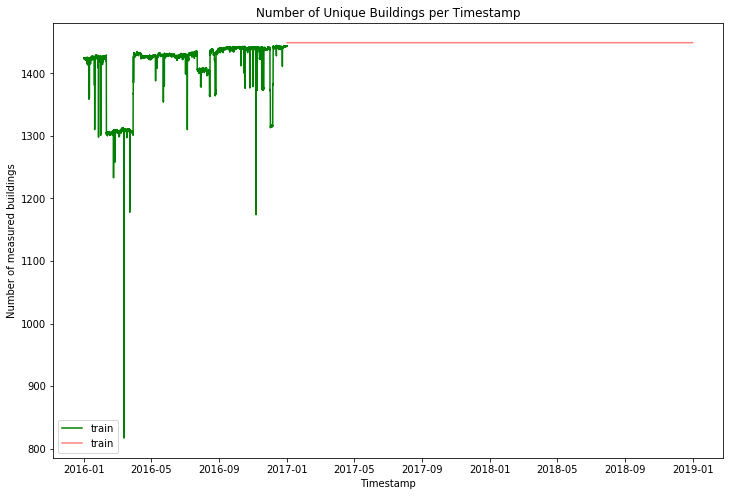

In [49]:
plt.figure(figsize=(12,8))
plt.title('Number of Unique Buildings per Timestamp')
plt.plot(train.groupby('timestamp')['building_id'].nunique(), label='train', color='g')
plt.plot(test.groupby('timestamp')['building_id'].nunique(), label='train', color='r', alpha=.5)
plt.xlabel('Timestamp')
plt.ylabel('Number of measured buildings')
plt.legend()
plt.show()

* Train: unstable, upward trend (new buldings being measured).
* Test: constant.

### Number of buildings of each type

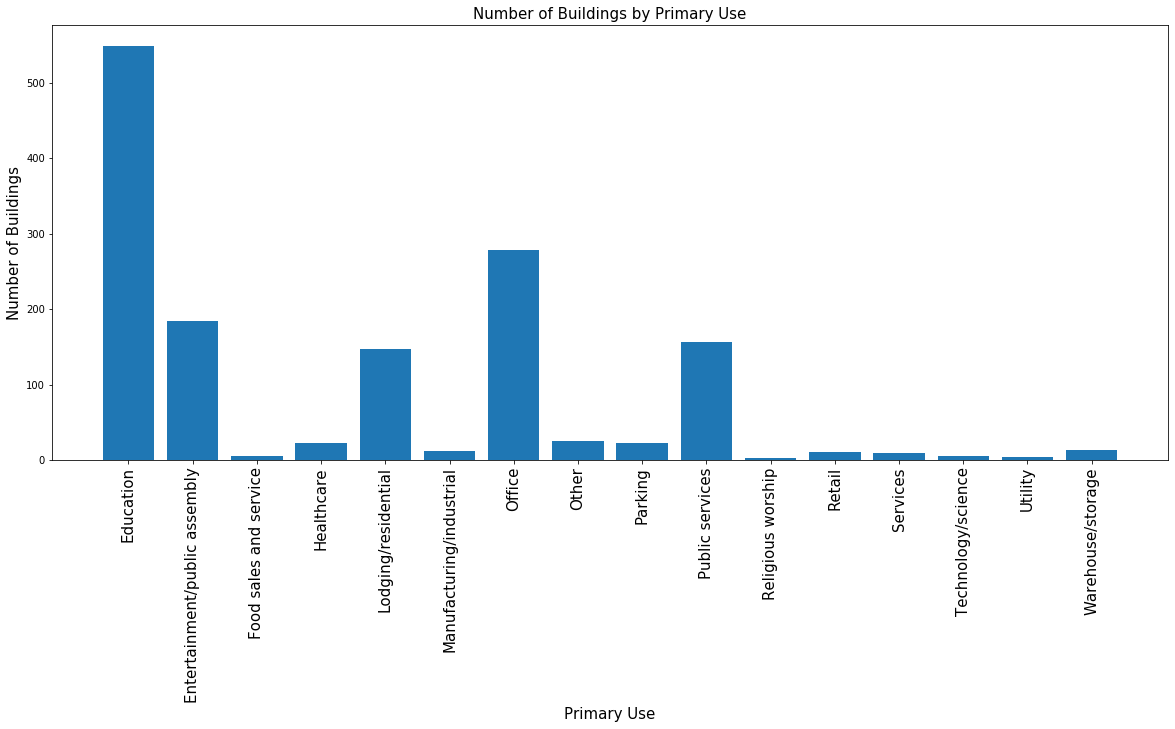

In [147]:
plt.figure(figsize=(20, 8))
data = building_metadata.groupby('primary_use').size()
x = data.index.values
y = data.values
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation='vertical', size=15)
plt.title('Number of Buildings by Primary Use', size=15)
plt.xlabel('Primary Use', size=15)
plt.ylabel('Number of Buildings', size=15)
plt.show()

# Meters

### How many bulildings have each meter?

In [79]:
pd.DataFrame({'Train': train.groupby('meter')['building_id'].nunique(),
              'Test': test.groupby('meter')['building_id'].nunique()})

,Train,Test
meter,,
0,1413,1413
1,498,498
2,324,324
3,145,145


# Weekly Periodicity

In [90]:
train['day_of_week'] = train['timestamp'].dt.dayofweek
meter_DOW_reading = pd.DataFrame(train.groupby(['meter', 'day_of_week'])['meter_reading'].mean())

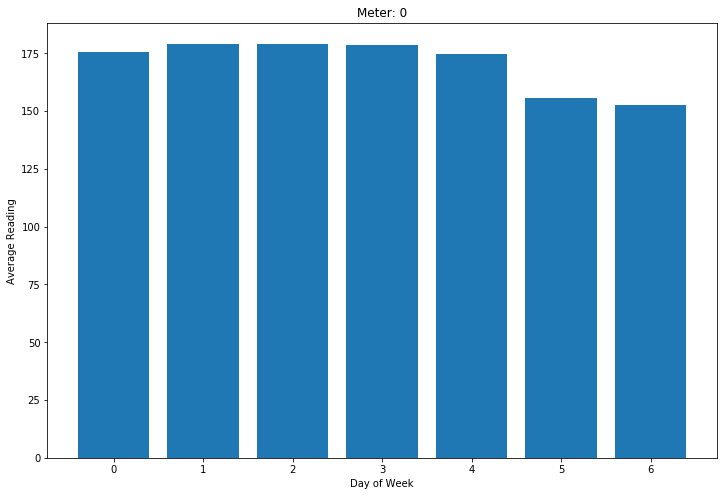

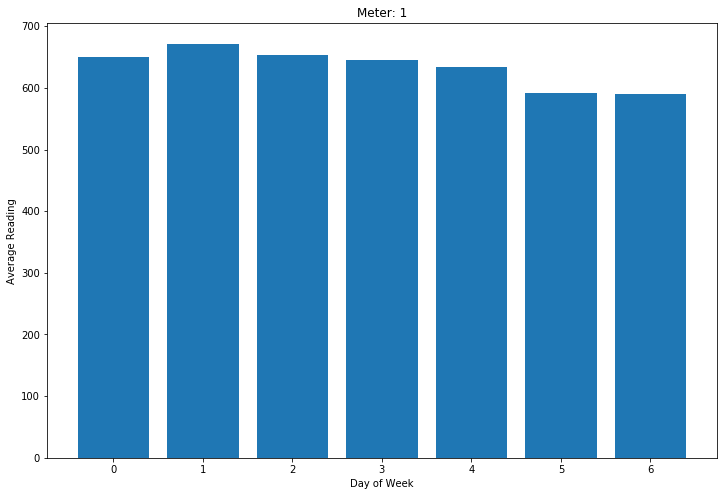

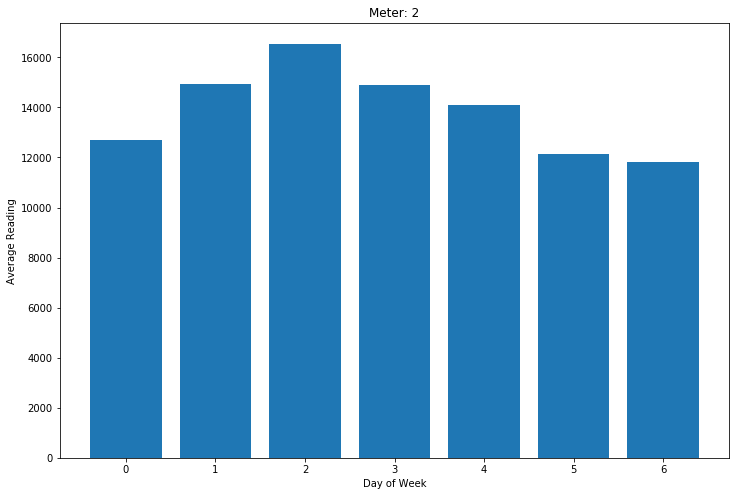

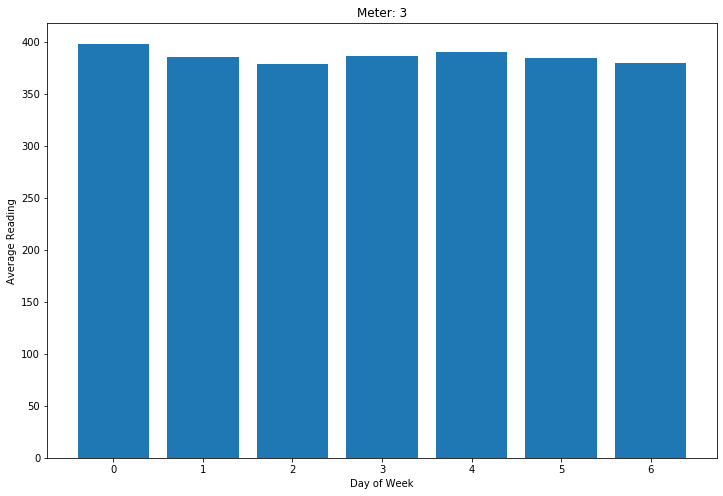

In [122]:
for meter in range(4):
    plt.figure(figsize=(12, 8))
    data = meter_DOW_reading.loc[meter]['meter_reading']
    x = data.index.values
    y = data.values
    x_pos = np.arange(len(x))
    plt.bar(x_pos, y, align='center')
    plt.xticks(x_pos, x)
    plt.title('Meter: %d' % meter)
    plt.xlabel('Day of Week')
    plt.ylabel('Average Reading')
    plt.show()

### Some example meter readings for each type of meter

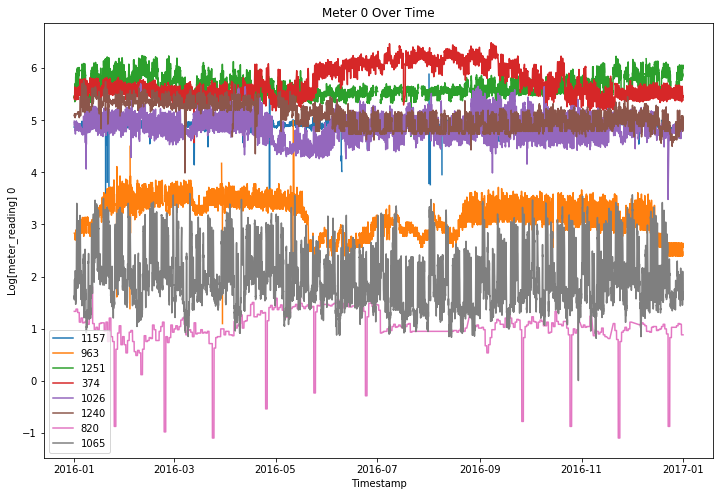

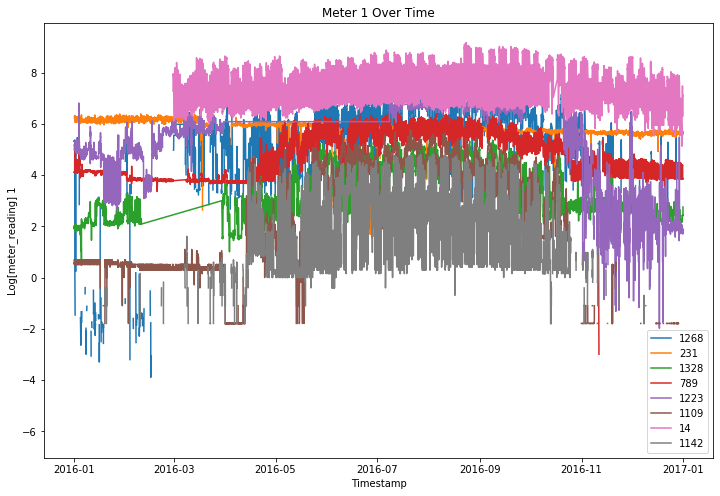

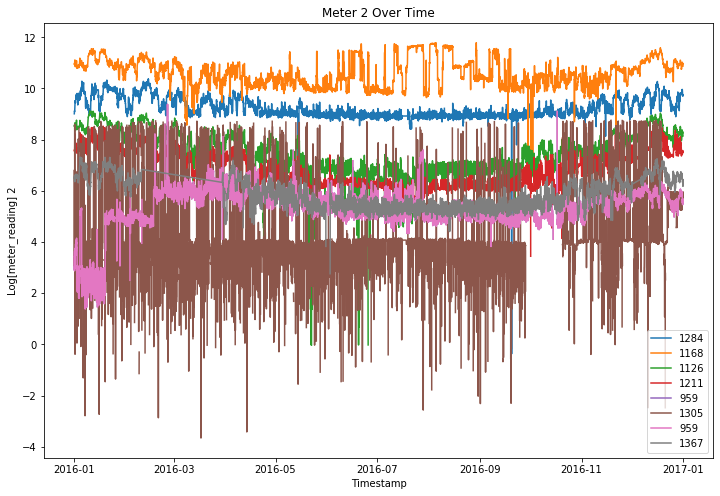

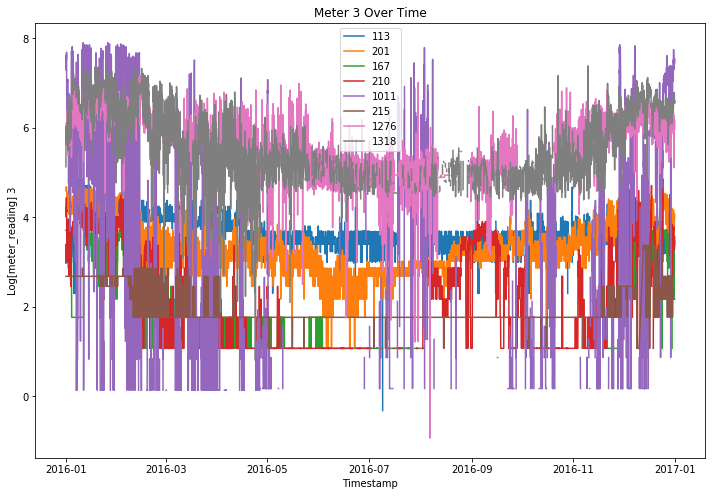

In [129]:
for meter in range(4):
    plt.figure(figsize=(12,8))
    for building in np.random.choice(train.loc[train['meter']==meter, 'building_id'].unique(), 8): # Sample buildings
        mask = np.bitwise_and(train['building_id']==building, train['meter']==meter)
        x = train.loc[mask, 'timestamp']
        y = np.log(train.loc[mask, 'meter_reading'])
        plt.plot(x, y, label=str(building))
    plt.title('Meter %d Over Time' % meter)
    plt.xlabel('Timestamp')
    plt.ylabel('Log[meter_reading] %d' % meter)
    plt.legend()
    plt.show()

* The measurement are very noisy.
* Some buildings show strong weekly periodicity, while others aren't.

# Ideas

* Quantify how strong is the weekly periodicity. (by building, by property use)